In [1]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.append("../src")
from eda import EDA
from forecast import Forecast

### Fetch data

In [2]:
eda = EDA()

In [3]:
data = eda.fetch_data(["TSLA"], "2015-01-01", "2026-01-15")

tsla = data["TSLA"].copy()

[*********************100%***********************]  1 of 1 completed


In [4]:
tsla = tsla.copy().reset_index().rename(columns={"index": "Date"}).set_index("Date")
tsla.index = pd.to_datetime(tsla.index)

In [5]:
tsla = tsla.asfreq('B').ffill()  # 'B' = business day


In [6]:
tsla = eda.calculate_daily_returns(data["TSLA"]).dropna()

### Train/test split

In [7]:
forecast = Forecast()

In [8]:
train, test = Forecast.prepare_data(tsla, column="Adj Close", train_end="2024-12-31")

In [9]:
print(test.head())


Price        Adj Close
Date                  
2025-01-01  403.839996
2025-01-02  379.279999
2025-01-03  410.440002
2025-01-06  411.049988
2025-01-07  394.359985


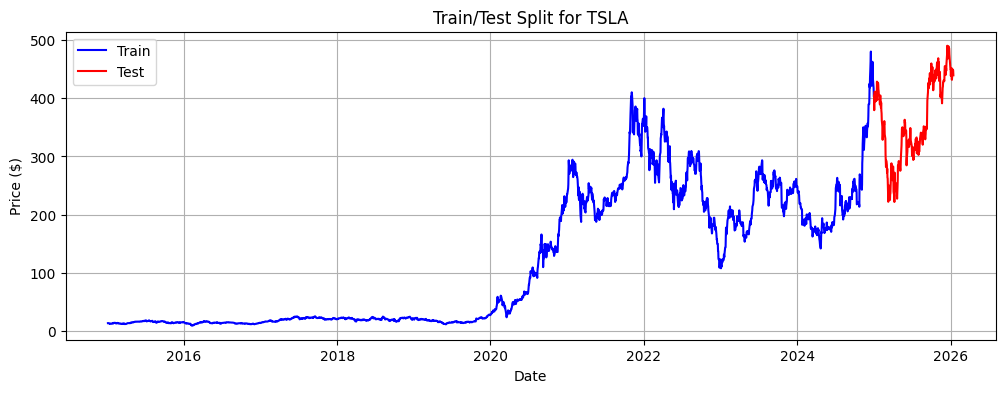

In [10]:
plt.figure(figsize=(12,4))
plt.plot(train['Adj Close'], label='Train', color='blue')
plt.plot(test['Adj Close'], label='Test', color='red')
plt.title("Train/Test Split for TSLA")
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.legend()
plt.grid(True)
plt.show()


### ARIMA Forecast

In [11]:
arima_model, arima_forecast = forecast.arima_forecast(train, test)

In [12]:
print(arima_forecast.head())

           Forecast
Date               
2025-01-01      NaN
2025-01-02      NaN
2025-01-03      NaN
2025-01-06      NaN
2025-01-07      NaN


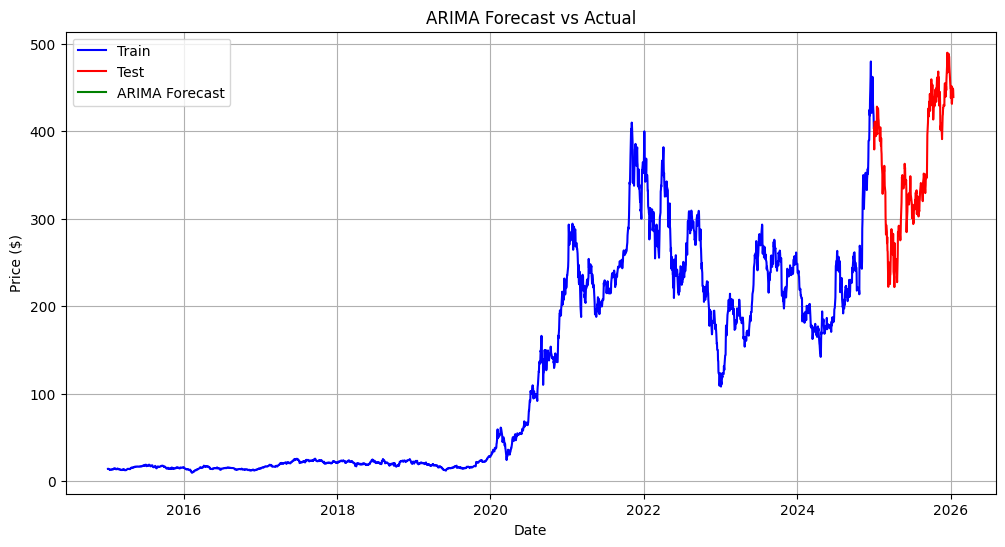

In [13]:
plt.figure(figsize=(12,6))
plt.plot(train['Adj Close'], label='Train', color='blue')
plt.plot(test['Adj Close'], label='Test', color='red')
plt.plot(arima_forecast['Forecast'], label='ARIMA Forecast', color='green')
plt.title("ARIMA Forecast vs Actual")
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.legend()
plt.grid(True)
plt.show()


### LSTM Forecast

In [14]:
lstm_forecast = forecast.lstm_forecast(train, test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


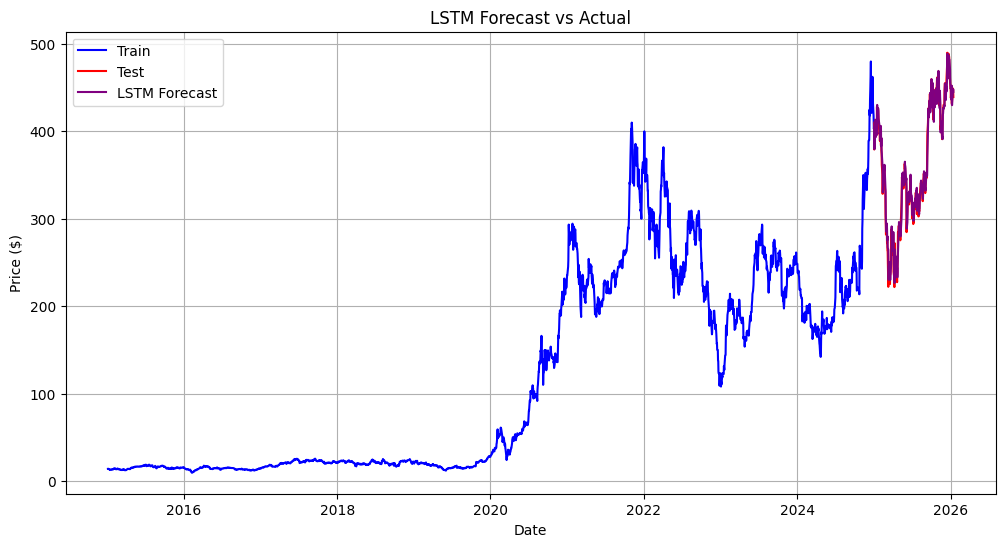

In [15]:
plt.figure(figsize=(12,6))
plt.plot(train['Adj Close'], label='Train', color='blue')
plt.plot(test['Adj Close'], label='Test', color='red')
plt.plot(lstm_forecast['Forecast'], label='LSTM Forecast', color='purple')
plt.title("LSTM Forecast vs Actual")
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.legend()
plt.grid(True)
plt.show()


### Evaluate

In [16]:
metrics_df = Forecast.evaluate_models(test, arima_forecast, lstm_forecast)
print(metrics_df)

     Model       MAE      RMSE      MAPE
0  Model 1       NaN       NaN       NaN
1  Model 2  9.803384  12.88956  2.868656


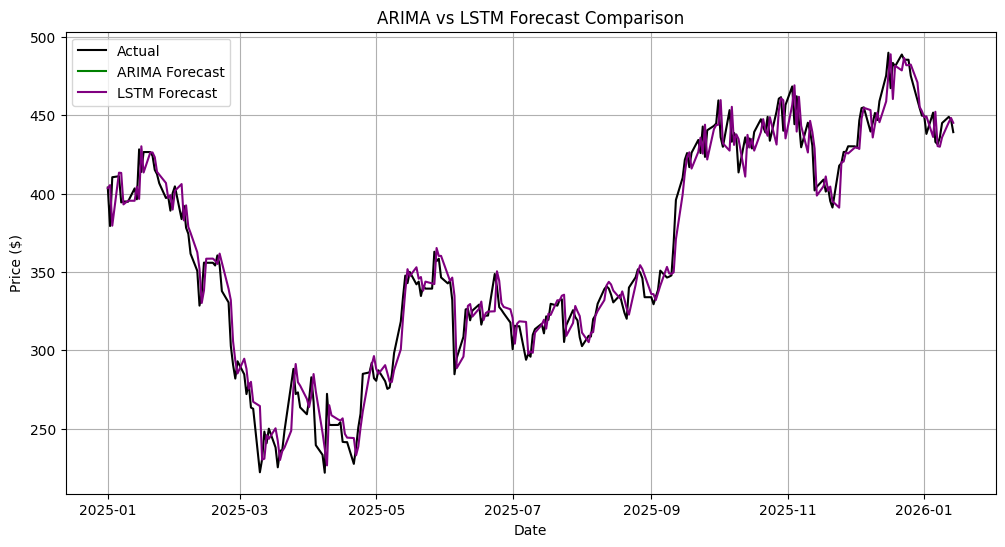

In [17]:
plt.figure(figsize=(12,6))
plt.plot(test['Adj Close'], label='Actual', color='black')
plt.plot(arima_forecast['Forecast'], label='ARIMA Forecast', color='green')
plt.plot(lstm_forecast['Forecast'], label='LSTM Forecast', color='purple')
plt.title("ARIMA vs LSTM Forecast Comparison")
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.legend()
plt.grid(True)
plt.show()


### Forecast Errors

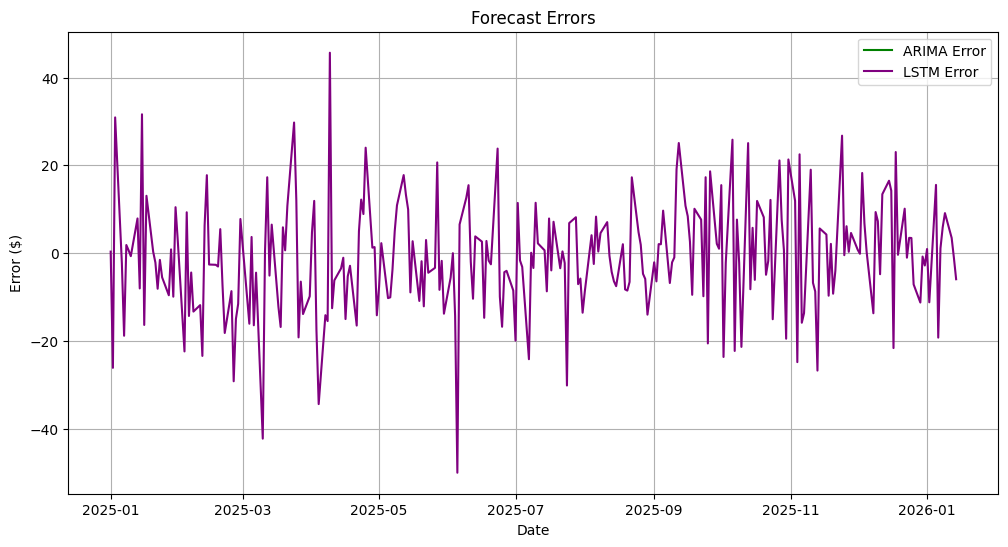

In [18]:
arima_error = test['Adj Close'] - arima_forecast['Forecast']
lstm_error  = test['Adj Close'] - lstm_forecast['Forecast']

plt.figure(figsize=(12,6))
plt.plot(arima_error, label='ARIMA Error', color='green')
plt.plot(lstm_error, label='LSTM Error', color='purple')
plt.title("Forecast Errors")
plt.xlabel("Date")
plt.ylabel("Error ($)")
plt.legend()
plt.grid(True)
plt.show()
